<a href="https://colab.research.google.com/github/codeprogredire/tensorflow/blob/main/rock_paper_scissors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q kaggle

In [ ]:
 ! mkdir ~/.kaggle

In [ ]:
!cp /content/drive/MyDrive/tensorflow/cv/kaggle.json ~/.kaggle/

In [ ]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download drgfreeman/rockpaperscissors -p /content/drive/MyDrive/tensorflow/cv

 99% 304M/306M [00:14<00:00, 25.0MB/s]
100% 306M/306M [00:14<00:00, 22.6MB/s]


In [ ]:
!mkdir -p /content/dataset/rock

In [ ]:
!mkdir -p /content/dataset/paper

In [ ]:
!mkdir -p /content/dataset/scissors

In [ ]:
!unzip -j /content/drive/MyDrive/tensorflow/cv/rockpaperscissors.zip rock/* -d /content/dataset/rock

Archive:  /content/drive/MyDrive/tensorflow/cv/rockpaperscissors.zip
  inflating: /content/dataset/rock/00nKV8oHuTGi20gq.png  
  inflating: /content/dataset/rock/01dM3ewPIsnBICu1.png  
  inflating: /content/dataset/rock/02vG75hQW9Vp4oTl.png  
  inflating: /content/dataset/rock/0NDYNEoDui7o64gU.png  
  inflating: /content/dataset/rock/0OEXfEooCXlljaEl.png  
  inflating: /content/dataset/rock/0P6uxM8Vr1DwySHe.png  
  inflating: /content/dataset/rock/0bioBZYFCXqJIulm.png  
  inflating: /content/dataset/rock/19H63c0MWD56EWNq.png  
  inflating: /content/dataset/rock/1BqjHe5igJAgUjiN.png  
  inflating: /content/dataset/rock/1COBZEE1ALiJIivQ.png  
  inflating: /content/dataset/rock/1DxbXT3M2qiMjCmC.png  
  inflating: /content/dataset/rock/1MOm36DHK0R8OfIC.png  
  inflating: /content/dataset/rock/1UXuUYJ4rVj2eSvt.png  
  inflating: /content/dataset/rock/1UucZqS3qblvU0cH.png  
  inflating: /content/dataset/rock/1VoYiUgPE6h45MLu.png  
  inflating: /content/dataset/rock/1WuMUpzupKs67q29.png  
  i

In [ ]:
!unzip -j /content/drive/MyDrive/tensorflow/cv/rockpaperscissors.zip paper/* -d /content/dataset/paper

Archive:  /content/drive/MyDrive/tensorflow/cv/rockpaperscissors.zip
  inflating: /content/dataset/paper/04l5I8TqdzF9WDMJ.png  
  inflating: /content/dataset/paper/0Og76sl5CJhbxWWx.png  
  inflating: /content/dataset/paper/0RA9rcrv8iVvuDDU.png  
  inflating: /content/dataset/paper/0Uomd0HvOB33m47I.png  
  inflating: /content/dataset/paper/0a3UtNzl5Ll3sq8K.png  
  inflating: /content/dataset/paper/0cb6cVL8pkfi4wF6.png  
  inflating: /content/dataset/paper/0eqArS2GgsBeqgSn.png  
  inflating: /content/dataset/paper/0t08v9bAaA0mXGCQ.png  
  inflating: /content/dataset/paper/0vugygEjxQJPr9yz.png  
  inflating: /content/dataset/paper/0zKU6wEhT2cDe9j0.png  
  inflating: /content/dataset/paper/14K62H4KG1hg5qiJ.png  
  inflating: /content/dataset/paper/1Dfw5FRlS4h60JPX.png  
  inflating: /content/dataset/paper/1Frbe8cdOdkciOBg.png  
  inflating: /content/dataset/paper/1Tt9U9SzrOm98Xtw.png  
  inflating: /content/dataset/paper/1fKclJk4eBWOQSR1.png  
  inflating: /content/dataset/paper/1jHtb93pI8

In [ ]:
!unzip -j /content/drive/MyDrive/tensorflow/cv/rockpaperscissors.zip scissors/* -d /content/dataset/scissors

Archive:  /content/drive/MyDrive/tensorflow/cv/rockpaperscissors.zip
  inflating: /content/dataset/scissors/0657zSfiTYzP2jrl.png  
  inflating: /content/dataset/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: /content/dataset/scissors/0Flw60Z2MAWWKn6S.png  
  inflating: /content/dataset/scissors/0Ug54ifXRqqlZS2Z.png  
  inflating: /content/dataset/scissors/0ePX1wuCc3et7leL.png  
  inflating: /content/dataset/scissors/0zoQAmDFXehOZsAp.png  
  inflating: /content/dataset/scissors/138Tx9KlEfheT3uB.png  
  inflating: /content/dataset/scissors/17HZDUFSVPxcar99.png  
  inflating: /content/dataset/scissors/1CXgK9fgGdSRggD9.png  
  inflating: /content/dataset/scissors/1Io5Ksm3bqy87EAU.png  
  inflating: /content/dataset/scissors/1L1n6plr7jlZGirw.png  
  inflating: /content/dataset/scissors/1MMkSW3f1CAsw03q.png  
  inflating: /content/dataset/scissors/1UojLz4CrT2G1Eo5.png  
  inflating: /content/dataset/scissors/1VRzspyXpQ6A2rKy.png  
  inflating: /content/dataset/scissors/1WX9KKoq0nkWiTxI.png  
 

# Checking image

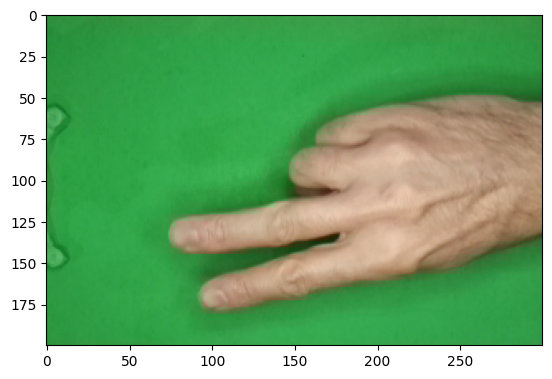

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

img=Image.open('/content/dataset/scissors/0657zSfiTYzP2jrl.png')

plt.imshow(img)
plt.show()

In [ ]:
import numpy as np
img=np.array(img)
img.shape

(200, 300, 3)

# Data preprocessing

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1/255.)

train_datagenerator=train_datagen.flow_from_directory(
    './dataset',
    target_size=(150,150),
    batch_size=64,
    class_mode='categorical'
)



Found 2188 images belonging to 3 classes.


## Model building

In [ ]:
import tensorflow as tf

model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(3,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_1 (Dense)             (None, 512)               2

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',optimizer=RMSprop(learning_rate=0.001),metrics=['accuracy'])

In [ ]:
history=model.fit(train_datagenerator,
                  steps_per_epoch=34,
                  epochs=7,
                  verbose=1)

Epoch 1/7
34/34 [==============================] - 11s 187ms/step - loss: 1.4246 - accuracy: 0.5975
Epoch 2/7
34/34 [==============================] - 6s 167ms/step - loss: 0.5775 - accuracy: 0.7768
Epoch 3/7
34/34 [==============================] - 5s 159ms/step - loss: 0.3925 - accuracy: 0.8564
Epoch 4/7
34/34 [==============================] - 7s 201ms/step - loss: 0.2528 - accuracy: 0.9115
Epoch 5/7
34/34 [==============================] - 6s 178ms/step - loss: 0.1863 - accuracy: 0.9369
Epoch 6/7
34/34 [==============================] - 6s 162ms/step - loss: 0.1145 - accuracy: 0.9614
Epoch 7/7
34/34 [==============================] - 6s 173ms/step - loss: 0.0977 - accuracy: 0.9652
